# Prática 3 - Modelando assuntos

In [1]:
from gensim import corpora, models, similarities
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from string import punctuation
from pprint import pprint

## Definindo um problema

A epidemia de Zika gerou uma epidemia de publicações científicas sobre o assunto. Como é uma doença pouco conhecida, pesquisas em diversas áreas do conhecimento precisam ser conduzidas para poder preencher a lacuna da nossa ignorância.

Neste exercício vamos analizar um corpus de resumos de artigos publicados sobre o assunto e tentar modelar os assuntos existentes.

In [2]:
dicionario = corpora.Dictionary.load('Dicionario_zika.dict')
corpus = corpora.MmCorpus('corpus_zika')

In [3]:
print(dicionario)
print(corpus)
498*5886

Dictionary(5886 unique tokens: ['measure', 'inhibits', 'antivirals', 'contribution', 'mid']...)
MmCorpus(498 documents, 5886 features, 24027 non-zero entries)


2931228

In [8]:
print(dicionario[35])
for doc in corpus[:3]:
    print(doc)

We
[(0, 2.0), (1, 1.0), (2, 1.0), (3, 1.0), (4, 1.0), (5, 3.0), (6, 1.0), (7, 2.0), (8, 3.0), (9, 1.0), (10, 1.0), (11, 1.0), (12, 2.0), (13, 1.0), (14, 1.0), (15, 1.0), (16, 2.0), (17, 1.0), (18, 2.0), (19, 1.0), (20, 1.0), (21, 1.0), (22, 1.0), (23, 1.0), (24, 1.0), (25, 2.0), (26, 1.0), (27, 1.0), (28, 1.0), (29, 1.0), (30, 2.0), (31, 1.0), (32, 2.0), (33, 1.0), (34, 1.0), (35, 2.0), (36, 1.0), (37, 3.0), (38, 3.0), (39, 1.0), (40, 3.0), (41, 1.0), (42, 1.0), (43, 2.0), (44, 1.0), (45, 2.0), (46, 3.0), (47, 3.0), (48, 5.0), (49, 1.0), (50, 1.0), (51, 2.0), (52, 2.0), (53, 1.0), (54, 1.0), (55, 1.0), (56, 1.0), (57, 1.0), (58, 1.0), (59, 1.0), (60, 1.0), (61, 1.0), (62, 2.0), (63, 1.0), (64, 1.0), (65, 1.0), (66, 1.0), (67, 3.0), (68, 3.0), (69, 1.0), (70, 2.0), (71, 1.0), (72, 1.0), (73, 1.0), (74, 1.0), (75, 1.0), (76, 2.0), (77, 1.0), (78, 5.0), (79, 1.0), (80, 1.0), (81, 1.0), (82, 1.0), (83, 12.0), (84, 1.0), (85, 1.0), (86, 1.0), (87, 1.0), (88, 1.0), (89, 2.0), (90, 2.0), (91,

## Latent Semantic Indexing - LSI

In [9]:
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [32]:
import pandas as pd
import seaborn as sns
from collections import OrderedDict
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [56]:
lsi = models.LsiModel(corpus_tfidf, id2word=dicionario, num_topics=10)
corpus_lsi = lsi[corpus_tfidf]

In [46]:
data = {i: OrderedDict(lsi.show_topic(i,10)) for i in range(10)}

In [47]:
print(lsi.show_topic(0,4))
OrderedDict(lsi.show_topic(0,4))

[('ZIKV', 0.34157754946597269), ('virus', 0.2589532962466361), ('Zika', 0.19200528472419356), ('infection', 0.15149989728673044)]


OrderedDict([('ZIKV', 0.34157754946597269),
             ('virus', 0.2589532962466361),
             ('Zika', 0.19200528472419356),
             ('infection', 0.15149989728673044)])

In [48]:
df = pd.DataFrame(data)
print(df.shape)
df = df.fillna(0).T

(57, 10)


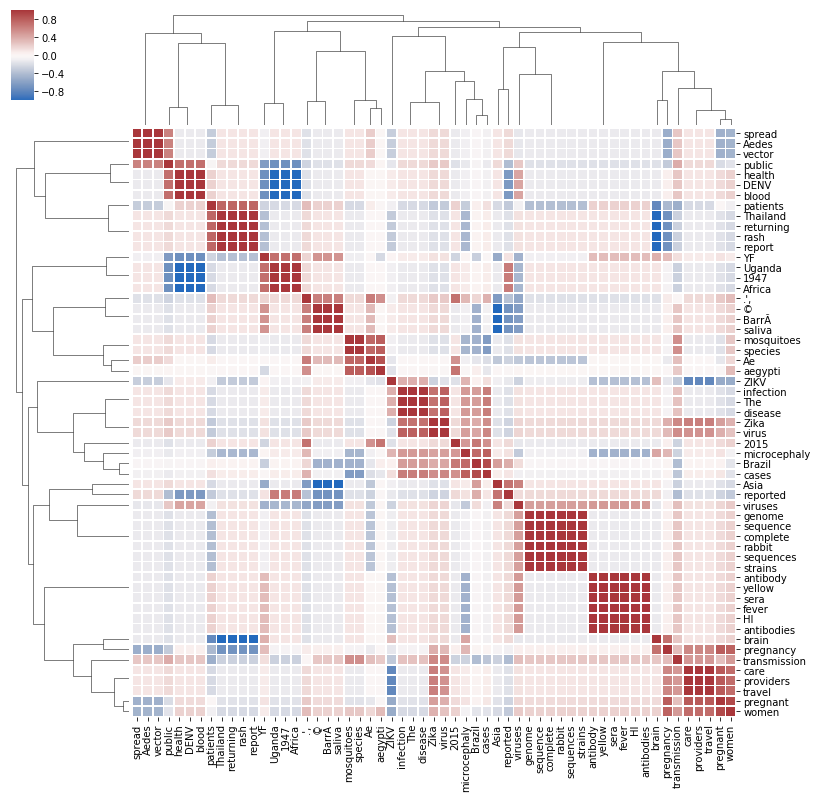

In [49]:
sns.clustermap(df.corr(), center=0, cmap="vlag", metric='cosine',
               linewidths=.75, figsize=(13, 13))

Depois de estimar o modelo, podemos olhar os 30 assuntos, listando apenas as 4 palavras mais importantes.

In [51]:
lsi.show_topics(10,4)

[(0, '0.342*"ZIKV" + 0.259*"virus" + 0.192*"Zika" + 0.151*"infection"'),
 (1, '-0.517*"ZIKV" + 0.241*"women" + 0.189*"virus" + 0.177*"pregnant"'),
 (2, '0.337*"ZIKV" + -0.251*"YF" + -0.200*"antibodies" + -0.195*"antibody"'),
 (3, '0.273*"ZIKV" + 0.170*"women" + -0.136*"spread" + 0.117*"pregnancy"'),
 (4,
  '0.370*"Ae" + 0.177*"transmission" + -0.152*"microcephaly" + 0.143*"aegypti"'),
 (5, '-0.295*"YF" + 0.207*"patients" + -0.163*"ZIKV" + -0.149*"microcephaly"'),
 (6, '-0.256*"Ae" + 0.186*"ZIKV" + -0.178*"Brazil" + -0.170*"microcephaly"'),
 (7, '0.404*"YF" + -0.127*"viruses" + -0.113*"public" + -0.104*"blood"'),
 (8, '0.167*"Ae" + -0.155*"sequence" + -0.152*"sequences" + -0.134*"viruses"'),
 (9, '-0.389*"YF" + -0.158*"Ae" + -0.120*"saliva" + 0.111*"viruses"')]

Podemos também olhar para os documentos do nosso corpus como uma combinação linear dos assuntos

In [52]:
for doc  in corpus_lsi:
    print(doc)
    break

[(0, 0.29345949180273639), (1, -0.045238539294030947), (2, 0.058141321080812304), (3, 0.34186611888639995), (4, 0.019284183630562609), (5, -0.089507821137489715), (6, -0.027912845143063768), (7, -0.064806149126194063), (8, 0.066229768508563797), (9, -0.007429908932425581)]


In [70]:
data = {'doc%s'%i: dict(doc) for i,doc in enumerate(corpus_lsi[:10])}
dfdoc = pd.DataFrame(data)
dfdoc = dfdoc.fillna(0)
dfdoc.head()

,doc0,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8,doc9
0,0.293448,0.280462,0.305186,0.333472,0.360320,0.197510,0.211605,0.290880,0.174393,0.276690
1,0.045910,0.073513,0.080104,0.237496,0.055351,0.077038,-0.012339,0.004119,0.052041,0.093814
2,0.059802,0.016407,0.207669,0.058833,0.156247,0.108603,0.077612,0.159632,0.003114,0.088531
3,-0.338071,0.098279,-0.123685,0.076724,-0.066332,-0.040690,-0.091927,-0.000565,-0.012654,0.047231
4,0.009629,0.025538,-0.044764,0.334676,-0.178169,-0.017421,-0.076579,-0.013151,0.053259,-0.018266


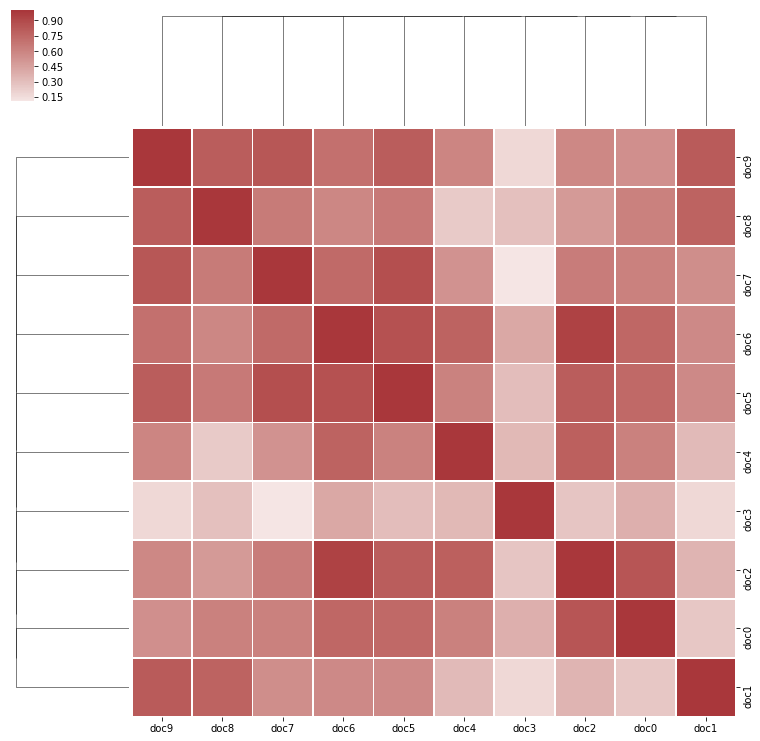

In [71]:
sns.clustermap(dfdoc.corr(), center=0, cmap="vlag", metric='hamming',
               linewidths=.75, figsize=(13, 13));

In [66]:
dfdoc.T.describe()

,0,1,2,3,4,5,6,7,8,9
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,0.109329,0.001527,-0.012893,0.002318,0.000027,0.002832,0.000310,-0.006457,-0.004438,-0.003866
std,0.123600,0.094665,0.087830,0.076518,0.073733,0.069870,0.068738,0.064839,0.062868,0.062469
min,0.000000,-0.470679,-0.438635,-0.338071,-0.202787,-0.342488,-0.234892,-0.205701,-0.361605,-0.356982
25%,0.000000,0.000000,-0.009995,-0.000423,-0.011972,0.000000,0.000000,-0.025780,-0.003138,-0.015536
50%,0.047621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.203830,0.016140,0.000000,0.010740,0.000000,0.015469,0.011102,0.000000,0.000214,0.000000
max,0.428312,0.301974,0.207669,0.302283,0.409304,0.265928,0.233406,0.379676,0.175709,0.190188


Podemos calcular a similaridade por assunto de um documento com todos os demais documentos do corpus.

In [72]:
index = similarities.MatrixSimilarity(corpus_lsi)

Vamos escolher o primeiro documento do corpus para ser a referência

In [73]:
sims = index[doc]
#pprint(list(enumerate(sims)))
pprint(sorted(list(enumerate(sims)), key=lambda x:x[1], reverse=True))

[(73, 0.87004942),
 (459, 0.86450005),
 (427, 0.83704489),
 (108, 0.83494574),
 (475, 0.83481497),
 (75, 0.83465475),
 (202, 0.83337098),
 (352, 0.81572568),
 (414, 0.80531114),
 (169, 0.78436548),
 (47, 0.78404289),
 (189, 0.78197801),
 (229, 0.76690847),
 (203, 0.76366138),
 (221, 0.759893),
 (392, 0.75976372),
 (447, 0.75698704),
 (182, 0.74682033),
 (360, 0.74494559),
 (58, 0.74354899),
 (370, 0.74033713),
 (469, 0.71678525),
 (18, 0.7157445),
 (429, 0.71456957),
 (79, 0.71443391),
 (320, 0.70757896),
 (389, 0.70740151),
 (431, 0.69884211),
 (156, 0.69863302),
 (51, 0.69745791),
 (369, 0.69511002),
 (13, 0.69462854),
 (201, 0.69346744),
 (132, 0.68861955),
 (448, 0.68639565),
 (403, 0.68627733),
 (240, 0.67763066),
 (334, 0.67686063),
 (252, 0.67128003),
 (441, 0.66998154),
 (251, 0.66935021),
 (364, 0.66766518),
 (109, 0.66162771),
 (442, 0.65840495),
 (137, 0.65382922),
 (318, 0.65159786),
 (1, 0.64967042),
 (106, 0.64941704),
 (412, 0.64837432),
 (395, 0.64803612),
 (82, 0.64632

## Latent Dirichlet Allocation - LDA

O LDA é uma técnica um pouco mais sofisticada que o LSI, que envolve uma interpretação probabilística do que é uma assunto. Para saber mais, veja este artigo: http://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf

In [77]:
lda_model = models.ldamodel.LdaModel(corpus, id2word=dicionario, num_topics=10, passes=10)

In [78]:
lda_model.show_topics(10)

[(0,
  '0.042*"virus" + 0.039*"Zika" + 0.016*"transmission" + 0.011*"infection" + 0.008*"women" + 0.008*"pregnancy" + 0.007*"[\'" + 0.006*".\']" + 0.006*"pregnant" + 0.005*"disease"'),
 (1,
  '0.020*"ZIKV" + 0.009*"The" + 0.009*"virus" + 0.007*"human" + 0.007*".\'," + 0.006*"1" + 0.006*"cells" + 0.005*"viruses" + 0.005*"infection" + 0.005*"Zika"'),
 (2,
  '0.011*"rabbits" + 0.009*"The" + 0.006*"Aedes" + 0.006*"mosquito" + 0.005*"days" + 0.005*"S" + 0.005*"development" + 0.004*".\']" + 0.004*"[\'" + 0.004*"fattening"'),
 (3,
  '0.015*"YF" + 0.015*"antibodies" + 0.015*"fever" + 0.012*"virus" + 0.011*"sera" + 0.011*"viruses" + 0.010*"antibody" + 0.009*"yellow" + 0.009*"The" + 0.008*"2"'),
 (4,
  '0.030*"virus" + 0.022*"Zika" + 0.021*"ZIKV" + 0.013*"The" + 0.013*"infection" + 0.008*"[\'" + 0.008*".\']" + 0.007*"cases" + 0.007*"outbreak" + 0.007*"dengue"'),
 (5,
  '0.018*"ZIKV" + 0.010*"Zika" + 0.008*"The" + 0.008*"disease" + 0.007*"fever" + 0.007*"PCR" + 0.007*"virus" + 0.007*"rabbit" + 0.

In [79]:
lsi.save?